In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture("dashcam1.webm")

cap.set(cv2.CAP_PROP_POS_FRAMES, 20)

ret, frame1 = cap.read()

cap.release()

In [3]:
h, w, c = frame1.shape

In [3]:
frame = frame1[:, :, ::-1]

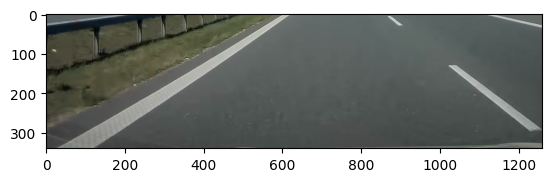

In [4]:
offset_top = 1000
offset_bottom = 100
offset_left = 700
offset_right = 600

frame_cropped = frame1[ offset_top:-offset_bottom , offset_left:-offset_right , ::-1 ]

plt.imshow(frame_cropped)

In [5]:
offsets1 = np.float32([[offset_left, offset_top], [offset_left, offset_top],
                       [offset_left, offset_top], [offset_left, offset_top]])

pts1 = np.float32([[435, 130], [1022, 130],
                   [190, 295], [1231, 295]])

w = 1000

pts2 = np.float32([[0, 0], [w, 0],
                   [0, w], [w, w]])


left = 2000
top =  14000

offsets2 = np.float32([[left,   top], [left,   top],
                      [left,   top], [left,   top]])

In [6]:
pts2+offsets2

array([[ 2000., 14000.],
       [ 3000., 14000.],
       [ 2000., 15000.],
       [ 3000., 15000.]], dtype=float32)

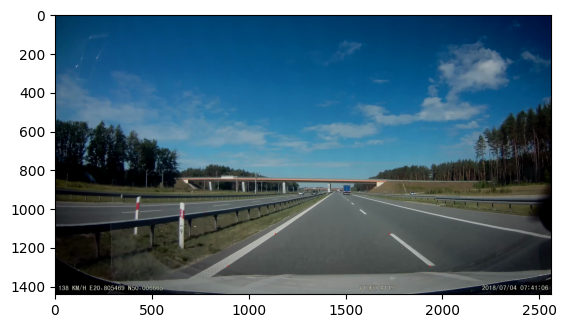

In [7]:
preview_points = frame.copy()

for p in pts1+offsets1:
    x = int(p[0])
    y = int(p[1])
    test = cv2.circle(preview_points, (x,y), 3, (255, 0, 0), -1)

plt.imshow(preview_points)

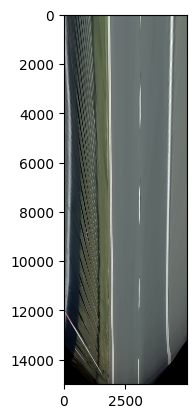

In [8]:
frame_copy = frame.copy()

matrix = cv2.getPerspectiveTransform(pts1+offsets1, pts2+offsets2)
frame_wrapped = cv2.warpPerspective(frame_copy, matrix, (5000, 15000))

plt.imshow(frame_wrapped)

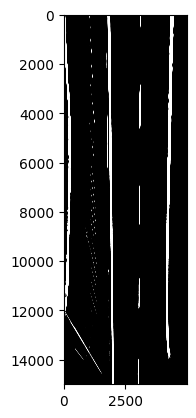

In [9]:
frame_wrapped_copy = frame_wrapped.copy()

grey = cv2.cvtColor(frame_wrapped_copy, cv2.COLOR_BGR2GRAY)
ret, th1 = cv2.threshold(grey, 127, 255, cv2.THRESH_BINARY)

plt.imshow(th1, cmap='gray')